 # Data Transformation
 
For this notebook, I will be using the following libraries:

- pandas for data manipulation.
- numpy for mathematical operations.
- seaborn and matplotlib for data visualizing.
- sklearn for machine learning.
- scipy for statistical operations.

## 1- Import the required libraries

In [29]:
# Data manipulation and mathematical operations
import pandas as pd
import numpy as np 

# Statistical computations
from scipy.stats import norm
from scipy import stats

# imputation
from sklearn.impute import KNNImputer

# encoding 
import category_encoders as ce
# Label Encoding
from sklearn.preprocessing import LabelEncoder
#One hot encoding 
from sklearn.preprocessing import OneHotEncoder
# Standard Scaling 
from sklearn.preprocessing import StandardScaler
# Normalization
from sklearn.preprocessing import MinMaxScaler
# Polynomial transforms
from sklearn.preprocessing import PolynomialFeatures
# Discretization transform 
from sklearn.preprocessing import KBinsDiscretizer

In [33]:
# Data visualization 
%matplotlib inline
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [4]:
import missingno as msno
%matplotlib inline

In [5]:
### Define some useful functions 
#The function is used to determine the type of the column:Categorical or Numerical  
def utils_recognize_type(dtf, col, max_cat):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

This notebook explores the concept of feature engineering and outlines the various tasks involved in this crucial phase. Feature engineering encompasses a range of activities, including feature selection, data transformation, text data processing, and time-series feature engineering. It is essential to note that all these tasks are conducted after completing the necessary data cleaning processes.

This notebook will be presented as follows:

    - Feature Selection: This involves the critical task of choosing the set of features to include in the model, a pivotal step in shaping the model's effectiveness.
    
    - Data Transformation: At times, we transform variables before incorporating them into the model. This step is crucial for optimizing the data's format and ensuring compatibility with the chosen machine learning model.
    
    - Text Data Processing: This encompasses the processes of tokenization, vectorization, and preprocessing of text data. These steps are essential to render the text data suitable for consumption by machine learning models.
    
    - Time-Series Feature Engineering: This involves creating lag features, rolling statistics, and other time-related features specifically designed for time-series data.

## 2- Data reading 

Surely, the first step is reading the available data with executing some data exploration instructions.

In [6]:
df=pd.read_csv('./data/weatherHistory.csv')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [7]:
# Giving look to the tail
df.tail(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [8]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [9]:
df.shape

(96453, 12)

## 3- Feature selection

In the next cell, I am selecting the most important features to work with discarding all irrelevant ones.

In [10]:
numerical_columns=['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_select=df[numerical_columns]
df_select.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63


## 4- Data transformation  : 

Here are the main tasks presented in this section : 

    - Feature Scaling: convert the scale of numeric data so they are comparable
        - Normalization
        - Standard scaling : converts features to standard normal variables (by subtracting the mean and dividing 
          the standard error)
        - Log scaling or Log transformation
        - Polynomial transformation
        
    - Feature Clipping : used also to remove outliers. It consists on capping all feature values greater or less 
      then a threshold (can be 99th-percentile) to a fixed value. For example, all battery values below 15 are 
      clipped to be exactly 15
    
    - Feature encoding : converting categorical variables to numeric variables
    
    - Feature extraction : use techniques like Principal Component Analysis (PCA) or Singular Value Decomposition  
      (SVD) to reduce dimensionality and extract essential features.
    
    - Binning or Discretization : group continuous variables into bins or discrete intervals to simplify complex 
      relationships.
    
    - Creating Interaction Terms : combining existing features to capture interactions between them.


The effectiveness of numerous machine learning algorithms diminishes when dealing with variables featuring non-standard probability distributions. This holds true for both real-valued input variables in classification and regression tasks, as well as real-valued target variables in regression tasks.

 ### 4.1- Feature Scaling :
 
     - Normalization 
     - Standardisation
     - Log transformation
     - Polynomial transformation
     - Robust scaling 
 

#### 4.1.1- Data Normalization 
- Data normalization consists of transforming features to be on a similar scale.
- Actually, not all datasets requires normalization, it is only required when the features range difference is very high. for example feature1 varies from 0 to 20 while feature2 varies from 1000 to 5000.

There are four common normalization techniques may be useful : 
- Min-Max feature scaling. 
- Maximum absolute scaling

#### a. Min-Max feature scaling (Normalization)
- Called also The min-max feature scaling|Scaling to a range.
- This can give us an idea about the range of values and is helpful to detect outliers.
- It subtracts the minimum value from each column’s highest value and divide by the range.
- Each new column has a minimum value of 0 (or -1) and a maximum value of 1. 
- range for min-max is [new min, new max] or commonly [0.0, 1.0] or [ -1.0, 1.0 ]

In [ ]:
# scale only one column using scikit-learn 'Wind Bearing (degrees)' (o,1)
# copy the data 
df_sklearn = df_select.copy() 
column = 'Wind Bearing (degrees)'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
df_sklearn.head(2)

In [ ]:
# apply normalization techniques by Pressure (millibars) 
column = 'Pressure (millibars)'
df_min_max_scaled = df_select.copy() 
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
df_min_max_scaled.head(2)

#### b. Maximum absolute scaling (Normalization)


In [ ]:
# copy the data 
df_max_scaled = df_select.copy() 

# apply normalization techniques on Wind Speed (km/h) 
column = 'Wind Speed (km/h)'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max() 

# view normalized data 
display(df_max_scaled) 

#### 4.1.2- Standard scaling

- Normalization and standardization are not the same things. 
- Standardization, interestingly, refers to normalization plus setting the mean to 0 and the standard deviation to 1.
- Normalization in machine learning is the process of translating data into the range [0, 1] or simply transforming data onto the unit sphere.
- Standardization Scaling transforms your feature distributions to have 0 as mean and 1 as std (so, to have normal distribution).
- It’s useful when there are a few outliers, but not so extreme that you need clipping.
- It is a variation of scaling that represents the number of standard deviations away from the mean.


#### a. Z-score method 
- Range for z-score using std dev is [ - infinity, infinity ] although it is very unlikely to get extreme values


In [ ]:
# copy the data 
df_z_scaled = df_select.copy() 

# apply normalization technique to Visibility (km)
column = 'Visibility (km)'
df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()

# view normalized data 
display(df_z_scaled) 


Note : 
- The mean shows us the central tendency of the distribution.
- The standard deviation quantifies its amount of variation. 
- For example, a low standard deviation suggests that data points tend to be close to the mean. 

#### b. Data Standardisation using `StandardScaler`

As mentioned before, Standardization is different than Normalization as it first subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

In [ ]:
# scale only one column using scikit-learn 'Wind Bearing (degrees)' (o,1)
# copy the data 
df_sklearn = df_select.copy() 
column = 'Humidity'
df_sklearn[column] = StandardScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
df_sklearn.head(2)

#### 4.1.3- log scaling or Log transformation 
- The log transformation is the most popular among the different types of transformations used in machine learning.
- It aims to make highly skewed distributions (features with high variance) less skewed.
- If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.
- Generally, we use the natural logarithm function in Log transformation.
- Captures relative changes, the magnitude of change and keeps everything positive.


However, our real raw data do not always follow a normal distribution. They are often so skewed making the results of our statistical analyses invalid. That’s where Log Transformation comes in.

The normal distribution is very useful in machine learning becasue it has deterministic statistical characteristics  and it helps detect linear relationship between variables. It consists that mode=mean=median: 

- Mean: called also average of a data set and it is found by summing all numbers in the data set and then dividing by the number of values in the set.
- Mode : it is the value that appears most often in a set of data values.
- Median : the middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).

#### Example 1: 

In [ ]:
# print variance of column
df_select.var()

From the cell, above it is clear that `Apparent Temperature (C)`, `Temperature (C)`, `Pressure (millibars)` and `Visibility (km)` have significant variance, respectively.

In [ ]:
# Calculate natural logarithm on
# 'Temperature (C)' column
df_select['Log Pressure (millibars)'] = np.log(df_select['Pressure (millibars)'])
 
# Show the dataframe
df_select.head(3)    

In [ ]:
print(df_select[['Pressure (millibars)', 'Log Pressure (millibars)']].var())

#### Example 2 : 
Here, we can simply use the `skew()` function to calculate our skewness level of the `Wind Speed (km/h)`

In [ ]:
print("Skewness: %f" % df['Wind Speed (km/h)'].skew())

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In our case, we have ~1.12, so it is considered highly skewed data.

In [ ]:
sp_untransformed = sns.histplot(df['Wind Speed (km/h)'])

In [ ]:
log_transformed = np.log(df['Wind Speed (km/h)'])

In [ ]:
df['Wind Speed (km/h)'].isnull().values.any()

In [ ]:
df_select=df[df['Wind Speed (km/h)']>0]
df_select.shape

In [ ]:
log_transformed = np.log(df_select['Wind Speed (km/h)'])

In [ ]:
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

So, it is clear that our data is highly skewed negatively as we have -1.165681 Skewness value.

Sometimes, if the column contains zeros or negative values, we can get nan as Skewness value.

There is other methods to correct data skewness. For example, Square Root Transform (np.sqrt) and the Box-Cox Transform (stats.boxcox from the scipy stats library)


#### 4.1.4- Polynomial transformation 

Some machine learning algorithms prefer or perform better with polynomial input features. Especially, predictive models. Polynomial features enable the utilization of simpler modeling algorithms by shifting a portion of the complexity associated with interpreting input variables and their relationships to the data preparation stage. However, using these features may not contribute to enhanced modeling performance. 


if X is one input feature ==> X^2 is its polynomial feature. This process can be repeated for each input variable in the dataset, creating a transformed version of each.The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3. Choosing the best polynomial degree is so important as it impacts the number of input features created. 

Squaring or cubing an input variable changes its probability distribution, creating a distinction between small and large values. This distinction is amplified with a higher exponent. Such transformations are often beneficial for machine learning algorithms, particularly in tasks involving numerical input variables, improving predictive accuracy, especially in regression tasks.




In [15]:
select_poly=df_select[['Temperature (C)','Humidity','Visibility (km)']]
select_poly

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


In [19]:
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(select_poly)
data
# Then you split train-test dataset

array([[  1.        ,   9.47222222,   0.89      , ...,   0.7921    ,
         14.085407  , 250.47177169],
       [  1.        ,   9.35555556,   0.86      , ...,   0.7396    ,
         13.610618  , 250.47177169],
       [  1.        ,   9.37777778,   0.89      , ...,   0.7921    ,
         13.311641  , 223.70885761],
       ...,
       [  1.        ,  22.03888889,   0.56      , ...,   0.3136    ,
          9.016     , 259.21      ],
       [  1.        ,  21.52222222,   0.6       , ...,   0.36      ,
          9.66      , 259.21      ],
       [  1.        ,  20.43888889,   0.61      , ...,   0.3721    ,
          9.467444  , 240.88281616]])

#### 4.1.5- Robust Scaling 

Robust scaling is a scaling technique to make variables more robust to the presence of outliers. Outliers, or extreme values, can disproportionately influence the mean and standard deviation, leading to skewed scaling when using traditional normalization techniques.

The robust scaling technique addresses this issue by using measures that are more resistant to outliers. The most common method for robust scaling involves using the interquartile range (IQR). Here's how it works:

1- Calculate the Interquartile Range (IQR): IQR is the range between the first quartile (Q1) and the third quartile (Q3). Mathematically, IQR = Q3 - Q1.

2- Scale the Data: 

    - Subtract the median (Q2) from each data point.
    - Divide each result by the IQR.
    
The formula for robust scaling (also known as IQR scaling) for a data point x is given by:

      Robust scaled value = (x - median)/IQR

The resulting scaled values are less affected by extreme outliers compared to standard scaling methods like min-max scaling or z-score normalization. Robust scaling is particularly useful when dealing with datasets where outliers may significantly impact the overall data distribution.

# Question : how to deal with categorical data ?

First of all, categorical variables can be divided into two categories:

* Nominal: no particular order such as `YES` / `NO` and `TRUE`/`FALSE`
* Ordinal: there is some order between values such as `High, Medium, Low`

In fact, there is two methods to deal with categorical data: 

* Drop categorical variables : we could lose a lot of important information. It is not very recommended
* Feature encoding 

###  4.2- Feature encoding : Encoding categorical values to numeric variables

##### Question :  why do we need to transform Categorical data to numerical ones ?

- Transforming categorical data to numerical data is an important step in many data analysis tasks.
- Categorical features Corresponds to string data types that is easily understood by human beings and hard to understand by machines.
- Categorical data must be converted into numerical data for further processing.
- Some machine learning algorithms do not accept categorical variables

#### 4.2.1. Solution 1: Using Python’s Category Encoder Library
category_encoders is an amazing Python library that provides 15 different encoding schemes.
- One-hot Encoding : the best choice (most common and correct way). It consists on adding one column for each possible value. However, be careful if our dataset is very large so this method can greatly expand the size of the dataset (may keep only low cardinality columns and delete the ones with high cardinality)
- Label Encoding
- Ordinal Encoding : it is not very recommended because it assumes certain order /ranking in the column values
- Helmert Encoding
- Binary Encoding : convert variables to either 0 or 1 suitable for variables with two values such as `YES/NO`, 
  `True/FALSE`. 
- Frequency Encoding
- Mean Encoding
- Weight of Evidence Encoding
- Probability Ratio Encoding
- Hashing Encoding
- Backward Difference Encoding
- Leave One Out Encoding
- James-Stein Encoding
- M-estimator Encoding
- Thermometer Encoder

In [20]:
# One hot encoding 
ce_OHE = ce.OneHotEncoder(cols=['Summary','Precip Type'])

data1 = ce_OHE.fit_transform(df)
data1.head()

,Formatted Date,Summary_1,Summary_2,Summary_3,Summary_4,Summary_5,Summary_6,Summary_7,Summary_8,Summary_9,...,Precip Type_3,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,0,1,0,0,0,0,0,0,0,...,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,0,1,0,0,0,0,0,0,0,...,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [21]:
# Binary Encoding
binary_enc = ce.BinaryEncoder(cols=['Summary']);

# transform the data
data_binary = binary_enc.fit_transform(df['Summary']);
data_binary

,Summary_0,Summary_1,Summary_2,Summary_3,Summary_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
96448,0,0,0,0,1
96449,0,0,0,0,1
96450,0,0,0,0,1
96451,0,0,0,0,1


#### 4.2.2-  Solution 2: Dummy Variable Encoding 
###### Using Pandas' Get Dummies

It is based on binary variables like OneHot Encoding

In [22]:
df_dummy=pd.get_dummies(df,columns=['Summary','Precip Type'])
df_dummy.head(4)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,...,0,0,0,0,0,0,0,0,1,0
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0


#### 4.2.3- Solution 3: Using Scikit-learn
Scikit-learn also has 15 different types of built-in encoders, which can be accessed from sklearn.preprocessing.

In [23]:
# Scikit-learn One-hot Encoding
one_he = OneHotEncoder(handle_unknown='ignore',sparse=False)
data_summary = pd.DataFrame(one_he.fit_transform(df[["Summary"]]))

data_summary

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Scikit-learn Label Encoding
label_enc = LabelEncoder()
# Label encoder takes no arguments
label_enc_summary = label_enc.fit_transform(df[['Summary']])

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In label encoding, each category is assigned a value from 1 through N where N is the number of categories for the feature. There is no relation or order between these assignments.

In [25]:
label_enc_summary

array([19, 19, 17, ..., 19, 19, 19])

#### Note!!  Pandas Label Encoding
It is also possible to use  `cat.codes` method of pandas for label encoding

#### 4.2.4- Solution 4 : Ordinal Encoding - Manual
Ordinal encoding is used to retain the ordinal (ordered) nature of the variable while encoding it. It is very similar to label encoding, the only difference is that Label encoding discard variables order. 
So, Ordinal Encoding assigns a sequence of integers.

In [26]:
# here is an external example as in our dataset we do not have a good example for Ordinal encoding
weather = {'Weather' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
df_aus=pd.DataFrame(weather,columns=["Weather"])
weather_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
df_aus

,Weather
0,very cold
1,cold
2,warm
3,hot
4,very hot


### How to choose the best Encoding Method 
Actually, it is not possible to say that there is one encoding technique that best fits almost all the problems. Choosing the Encoding Method depends on a lot of factors such as if we need to keep order or not?, the size of our dataset, etc. 
Generally, get_dummies method has an advantage as it could be easily implmented.

### 4.3- Feature extraction

### 4.4- Binning or Discretization

Certain machine learning algorithms, like decision trees and rule-based models, may work better with categorical or ordinal input variables. Some input variables may exhibit highly skewed distributions, such as an exponential distribution or a distribution with significant spread due to the presence of outliers. Non-standard and multi-modal distributions in a dataset can pose challenges when modeling with various machine learning algorithms.


It is often beneficial to transform each input variable to conform to a standard probability distribution. One method involves converting numerical variables into discrete probability distributions, where each numerical value is assigned a label, and these labels maintain an ordered (ordinal) relationship. This approach is Known as binning or discretization transformation.


A discretization transform can enhance the performance of certain machine learning models on datasets by converting the probability distribution of numerical input variables into a discrete form. Each continous variable values are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved. The use of bins is often referred to as binning or k-bins, where k refers to the number of groups to which a numeric variable is mapped.

Various approaches exist for grouping values into k discrete bins, including:

  - Uniform Binning: All bins have the same width across the entire range of possible values for the variable.
  - Quantile Binning: Bins are formed based on percentiles, ensuring an equal number of values in each bin.
  - Clustered Binning: Clusters are identified, and examples are allocated to each group based on their proximity or  
    similarity.

In [27]:
select_bins=df_select[['Temperature (C)']]
select_bins

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [34]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(select_bins)
data_trans

array([[5.],
       [5.],
       [5.],
       ...,
       [7.],
       [7.],
       [6.]])

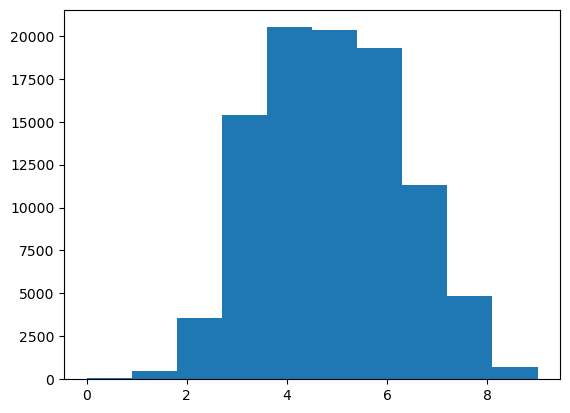

In [35]:
pyplot.hist(data_trans, bins=10)
pyplot.show()

### 4.5- Creating Interaction Terms